<a href="https://colab.research.google.com/github/Aakarsh2Mittal/Proofs-for-self-projects/blob/main/IndexAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Dataset.csv')

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5470 non-null   int64  
 1   Date               5470 non-null   object 
 2   Open               5470 non-null   float64
 3   High               5470 non-null   float64
 4   Low                5470 non-null   float64
 5   Close              5470 non-null   float64
 6   Shares Traded      5470 non-null   int64  
 7   Turnover (Rs. Cr)  5470 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 342.0+ KB


In [4]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,02-Apr-2001,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,03-Apr-2001,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,04-Apr-2001,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,06-Apr-2001,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,09-Apr-2001,1137.60,1138.55,1116.10,1128.35,28396434,746.64


In [5]:
df_new = df.head(5221)

In [6]:
df_new

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,02-Apr-2001,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,03-Apr-2001,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,04-Apr-2001,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,06-Apr-2001,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,09-Apr-2001,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5216,5216,24-Mar-22,17094.95,17291.75,17091.15,17222.75,290280124,25011.72
5217,5217,25-Mar-22,17289.00,17294.90,17076.55,17153.00,237115741,20031.39
5218,5218,28-Mar-22,17181.85,17235.10,17003.90,17222.00,253240837,19976.26
5219,5219,29-Mar-22,17297.20,17343.65,17235.70,17325.30,235149625,20305.78


In [7]:
type(df_new['Date'][0])
df_new['Date'] = pd.to_datetime(df_new['Date'].to_numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
type(df_new['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_new

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78


In [10]:
df = df_new

In [11]:
# df.tail(250)
# df.drop(index = 5)

In [12]:

df.drop_duplicates()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78


In [13]:
df1 = df

In [ ]:
a = df1['Close'].to_numpy()

In [ ]:
a

array([ 1138.1 ,  1149.25,  1136.65, ..., 17222.  , 17325.3 , 17498.25])

In [ ]:
len(a)

5221

In [ ]:
b = np.insert(a,0,0)
a
len(b)
c = np.delete(b,len(b)-1)
c
len(c)

5221

In [ ]:
df1['temp'] = c

In [ ]:
df1['gap'] = df1['Open'] - df1['temp']

In [ ]:
df1

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,1148.10
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00
...,...,...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72,17245.65,-150.70
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39,17222.75,66.25
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26,17153.00,28.85
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78,17222.00,75.20


In [ ]:
df['gap'] = df1['gap']

In [ ]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,1148.10
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00
...,...,...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72,17245.65,-150.70
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39,17222.75,66.25
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26,17153.00,28.85
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78,17222.00,75.20


In [ ]:
arr = df['gap'].to_numpy()

In [ ]:
arr[0] = 0

In [ ]:
arr

array([  0.  ,  -1.45,  -3.15, ...,  28.85,  75.2 , 142.85])

In [ ]:
gp = df['Open']

In [ ]:
gp

0        1148.10
1        1136.65
2        1146.10
3        1137.55
4        1137.60
          ...   
5216    17094.95
5217    17289.00
5218    17181.85
5219    17297.20
5220    17468.15
Name: Open, Length: 5221, dtype: float64

In [ ]:
arr = (arr/gp)*100
arr

0       0.000000
1      -0.127568
2      -0.274845
3       0.079117
4      -0.175809
          ...   
5216   -0.881547
5217    0.383192
5218    0.167910
5219    0.434752
5220    0.817774
Name: Open, Length: 5221, dtype: float64

In [ ]:
b = arr[1]
np.round(b,3)

-0.128

In [ ]:
ax = np.round(arr,3)
ax

0       0.000
1      -0.128
2      -0.275
3       0.079
4      -0.176
        ...  
5216   -0.882
5217    0.383
5218    0.168
5219    0.435
5220    0.818
Name: Open, Length: 5221, dtype: float64

In [ ]:
df['gap-per'] = ax

In [ ]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45,-0.128
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15,-0.275
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90,0.079
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00,-0.176
...,...,...,...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72,17245.65,-150.70,-0.882
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39,17222.75,66.25,0.383
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26,17153.00,28.85,0.168
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78,17222.00,75.20,0.435


In [ ]:
40163288 * 1148.10 / 10000000

4611.147095279999

In [ ]:
import matplotlib.pyplot as plt

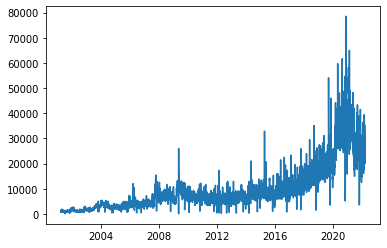

In [ ]:
plt.plot(df['Date'], df['Turnover (Rs. Cr)'])  # Plot the chart
plt.show()

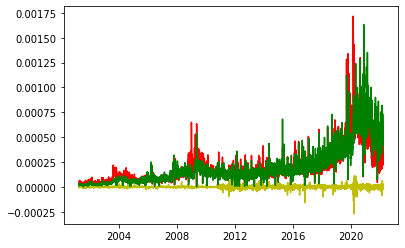

In [ ]:
plt.plot(df['Date'], df['Shares Traded']/sum(df['Shares Traded']), color = 'r', label = 'share')
plt.plot(df['Date'], df['gap-per']/(sum(df['gap-per']*100)), color = 'y', label = 'share')
plt.plot(df['Date'], df['Turnover (Rs. Cr)']/sum(df['Turnover (Rs. Cr)']), color = 'g', label = 'turnover')  # Plot the chart
plt.show()

In [ ]:
import matplotlib.pyplot as plt

(0.0, 410.0)

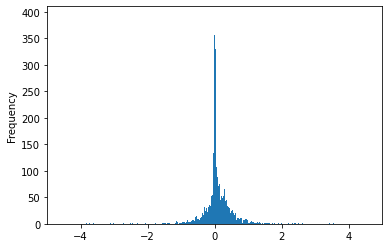

In [ ]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-5,5)
plt.ylim(0,410)

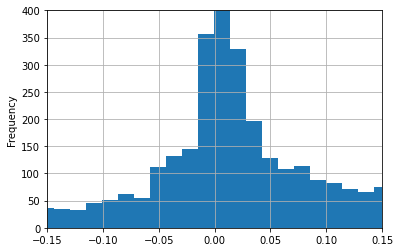

In [ ]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-.15,.15)
plt.ylim(0,400)
plt.grid(True)
plt.show()

(0.0, 5.0)

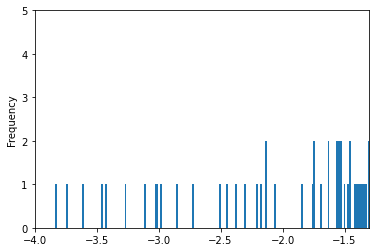

In [ ]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-4,-1.3)
plt.ylim(0,5)

(0.0, 5.0)

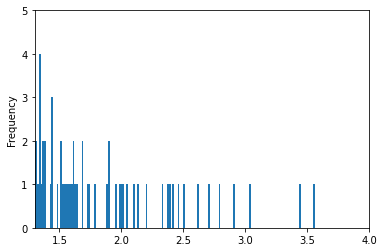

In [ ]:
histo = ax.plot.hist(bins=1000)
plt.xlim(1.3, 4)
plt.ylim(0,5)

In [ ]:
#turnover
#holiday - > just immediate one
#ok just note. prev. close - todays low -> candlestick thing
#interest rate, discount upone that , also the interest rate

#new ideas
'''
1.make a new holidays column, and note down the number of holidays, this particular day has had.. and also make different dataframes first with normalization and the second with different categorization based upon the number of holidays.
2.quaterly.. analyze the months during the financial earning releases by the company
3.analyze months of important days, election, demonitization, etc.
4.take into account market behaviour based upon the cycles of different secotors of stocks, i.e. banking metals commodity auto etc.

'''

'\n1.make a new holidays column, and note down the number of holidays, this particular day has had.. and also make different dataframes first with normalization and the second with different categorization based upon the number of holidays.\n2.quaterly.. analyze the months during the financial earning releases by the company\n3.analyze months of important days, election, demonitization, etc.\n4.take into account market behaviour based upon the cycles of different secotors of stocks, i.e. banking metals commodity auto etc.\n\n'

In [ ]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45,-0.128
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15,-0.275
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90,0.079
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00,-0.176
...,...,...,...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72,17245.65,-150.70,-0.882
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39,17222.75,66.25,0.383
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26,17153.00,28.85,0.168
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78,17222.00,75.20,0.435


In [ ]:
a = df['Date'].to_numpy()

In [ ]:
b = np.insert(a,0,0)
c = np.delete(b,len(b)-1)
df['temp'] = c

In [ ]:
df['Holiday'] = df['Date'] - df['temp']

In [ ]:
a = df['Holiday'].dt.days

In [ ]:
df['Holiday'] = a -1

In [ ]:
df['Holiday'][0] = 0
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,Holiday
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-1.45,-0.128,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,-3.15,-0.275,0
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,0.90,0.079,1
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,-2.00,-0.176,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5216,5216,2022-03-24,17094.95,17291.75,17091.15,17222.75,290280124,25011.72,2022-03-23,-150.70,-0.882,0
5217,5217,2022-03-25,17289.00,17294.90,17076.55,17153.00,237115741,20031.39,2022-03-24,66.25,0.383,0
5218,5218,2022-03-28,17181.85,17235.10,17003.90,17222.00,253240837,19976.26,2022-03-25,28.85,0.168,2
5219,5219,2022-03-29,17297.20,17343.65,17235.70,17325.30,235149625,20305.78,2022-03-28,75.20,0.435,0


(array([3.98e+03, 0.00e+00, 1.62e+02, 0.00e+00, 9.63e+02, 0.00e+00,
        1.06e+02, 0.00e+00, 9.00e+00, 1.00e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

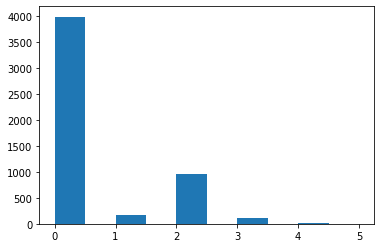

In [ ]:
plt.hist(df['Holiday'])

In [ ]:
df['Holiday'].value_counts()

0    3980
2     963
1     162
3     106
4       9
5       1
Name: Holiday, dtype: int64

In [ ]:
df5 = df.index[df['Holiday']==5].to_list()
df5

[3370]

In [ ]:
df.iloc[3367:3375]

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,Holiday
3367,3367,2014-09-29,7978.45,7991.75,7934.70,7958.90,97267975,5089.35,2014-09-26,9.60,0.120,2
3368,3368,2014-09-30,7948.80,8030.90,7923.85,7964.80,141142071,7467.66,2014-09-29,-10.10,-0.127,0
3369,3369,2014-10-01,7960.50,7977.50,7936.70,7945.55,112997913,5979.61,2014-09-30,-4.30,-0.054,0
3370,3370,2014-10-07,7897.40,7943.05,7842.70,7852.40,148199508,7982.75,2014-10-01,-48.15,-0.610,5
3371,3371,2014-10-08,7828.75,7869.90,7815.75,7842.70,135914083,7408.61,2014-10-07,-23.65,-0.302,0
3372,3372,2014-10-09,7886.50,7972.35,7886.50,7960.55,123767811,6797.45,2014-10-08,43.80,0.555,0
3373,3373,2014-10-10,7911.00,7924.05,7848.45,7859.95,142926893,8473.90,2014-10-09,-49.55,-0.626,0
3374,3374,2014-10-13,7831.00,7901.15,7796.00,7884.25,118781369,6584.44,2014-10-10,-28.95,-0.370,2


In [ ]:
df['RGLabel'][0] = 0;
for i in range(1,5222):
  if (df['Close'][i]-df['Open'][i]>=0):
    df['RGLabel'][i] = 1
  else:
    df['RGLabel'][i] = 0

In [ ]:
E1 = 0.2
df['GpFE1'][0] = 0
for i in range(1,5222):
  if (df['RGLabel'][i]==0 && df['Gap'][i]>0):
    if ((df['Close'][i]-df['Close'][i-1])<=E1):
      df['GpFE1'][i] = 1
    else:
      df['GpFE1'][i] = 0
  elif (df['RGLabel'][i]==1 && df['Gap'][i]<0)
    if ((df['Close'][i-1]-df['Close'][i])<=E1):
      df['GpFE1'][i] = 1
    else:
      df['GpFE1'][i] = 0
  else:
    df['GpFE1'][i] = 0

In [ ]:
E1 = 0.3
df['GpFE2'][0] = 0
for i in range(1,5222):
  if (df['RGLabel'][i]==0 && df['Gap'][i]>0):
    if ((df['Close'][i]-df['Close'][i-1])<=E1):
      df['GpFE2'][i] = 1
    else:
      df['GpFE2'][i] = 0
  elif (df['RGLabel'][i]==1 && df['Gap'][i]<0)
    if ((df['Close'][i-1]-df['Close'][i])<=E1):
      df['GpFE2'][i] = 1
    else:
      df['GpFE2'][i] = 0
  else:
    df['GpFE2'][i] = 0